# <i class="fa-solid fa-dumbbell"></i> Additional Exercises

## Exercise 1: Resampling Methods

The dataset we are using for the exercise is the [California Housing Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html). It contains 20640 samples and 8 features. In this dataset, we have information regarding the demography (income, population, house occupancy) in the districts, the location of the districts (latitude, longitude), and general information regarding the house in the districts (number of rooms, number of bedrooms, age of the house). Since these statistics are at the granularity of the district, they corresponds to averages or medians.

Familiarize yourself with the dataset by exploring the documentation and looking at the data. What are the features and target? 

In [1]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
df = data.frame

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Let’s have a quick look at the distribution of these features by plotting their histograms.

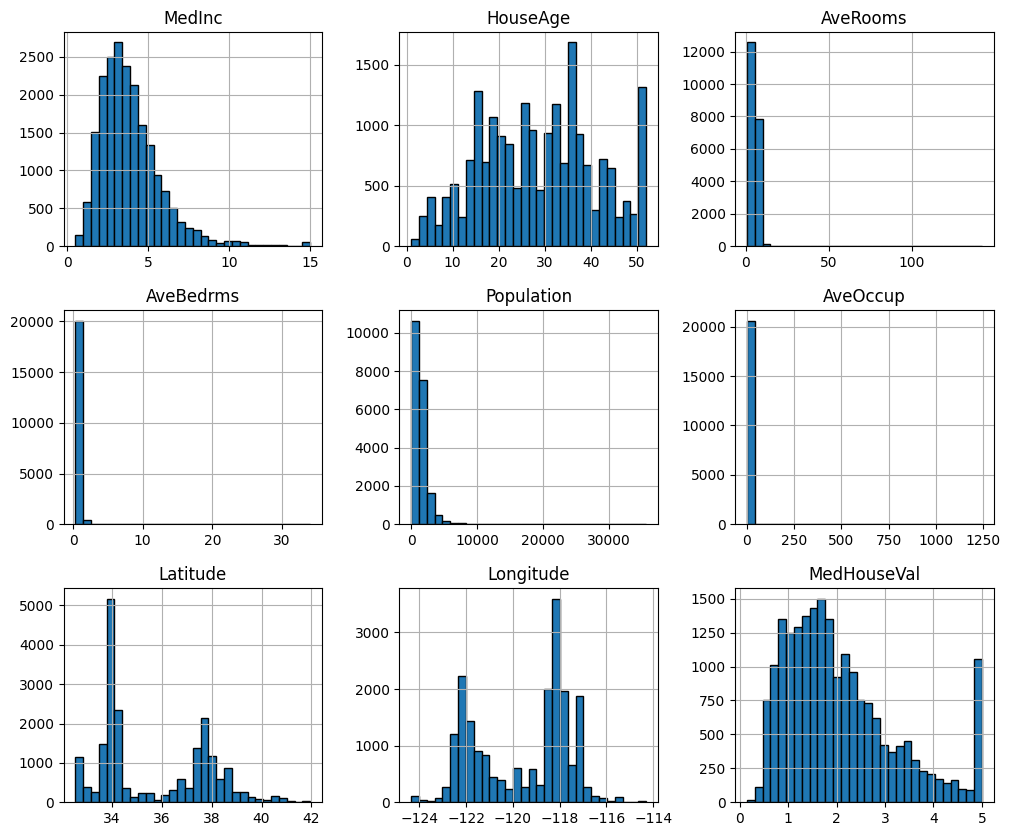

In [2]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black");

1. Prepare the data for cross validation. This will require you to have a variable (e.g. `X`) for the features and a variable for the target (e.g. `y`).
2. Set up a k-fold cross validation for a linear regression
    - Choose an appropriate k
    - Define the model
    - Perform cross validation
    - Use the mean squared error (MSE) to assess model performance

*Hints:*
- *For 1: You can achieve this by e.g. creating them from the DataFrame, or by using the `return_X_y` parameter on the [`fetch_california_housing()` function](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html)*
- *For 2: You can use the `LinearRegession()` model from sklearn. You can further evaluate the model and specify the (negative) MSE as a performance measure in `cross_val_score()`*

In [3]:
# TODO: Prepare data
X, y = fetch_california_housing(return_X_y=True)

In [4]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score 

# TODO: Implement CV
k_fold = KFold(n_splits=5)
model = LinearRegression()

neg_mse = cross_val_score(model, X, y, cv=k_fold, scoring='neg_mean_squared_error')
mse = -neg_mse

print(f"Average MSE:       {mse.mean()}")
print(f"MSE for each fold: {mse}")

Average MSE:       0.5582901717686809
MSE for each fold: [0.48485857 0.62249739 0.64621047 0.5431996  0.49468484]


## Exercise 2: LOOVC

1. Use LOOVC and compare the average MSE
2. Get the minimum and maximum MSE value. Discuss the range!
3. Plot the MSE values in a histogram (thex range should be from 0 to 6)
4. Calculate the median MSE and discuss if it might be a more appropriate measure than the mean

*Hints*
- *As we have 20640 observations this will probably take more than a minute to calculate. Feel free to subset the number of observations to e.g. 5000.* 

Average MSE: 4.52148803454314
Minimum MSE: 4.8924903912868155e-08
Maximum MSE: 20152.477041272956
Median MSE: 0.14930186919081195


(array([2.258e+03, 8.050e+02, 5.360e+02, 3.600e+02, 2.080e+02, 1.430e+02,
        1.050e+02, 9.600e+01, 6.800e+01, 3.900e+01, 3.900e+01, 3.400e+01,
        2.400e+01, 1.700e+01, 1.800e+01, 1.200e+01, 1.400e+01, 7.000e+00,
        1.000e+01, 1.000e+01, 8.000e+00, 1.000e+01, 7.000e+00, 1.300e+01,
        3.000e+00, 1.700e+01, 6.000e+00, 5.000e+00, 6.000e+00, 5.000e+00,
        3.000e+00, 6.000e+00, 8.000e+00, 3.000e+00, 2.000e+00, 5.000e+00,
        5.000e+00, 3.000e+00, 0.000e+00, 6.000e+00, 1.000e+00, 4.000e+00,
        1.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 6.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00]),
 array([0.  , 0.12, 0.24, 0.36, 0.48, 0.6 , 0.72, 0.84, 0.96, 1.08, 1.2 ,
        1.32, 1.44, 1.56, 1.68, 1.8 , 1.92, 2.04, 2.16, 2.28, 2.4 , 2.52,
        2.64, 2.76, 2.88, 3.  , 3.12, 3.24, 3.36, 3.48, 3.6 , 3.72, 3.84,
        3.96, 4.08, 4.2 , 4.32, 4.44, 4.56, 4.68, 4.8 , 4.92, 5.04, 5.16,
        5.28, 5.4 , 5.52, 5.64, 5.76, 5.88, 6.  ]),
 <BarContainer object of 50 

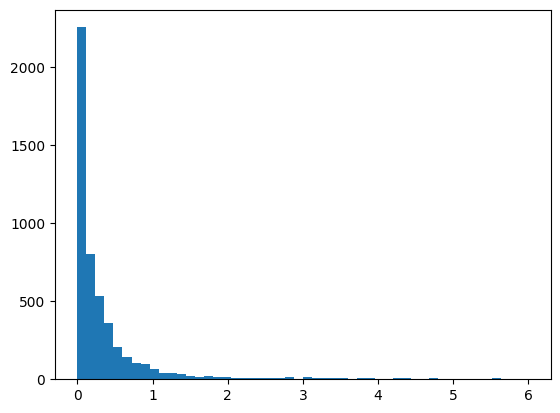

In [5]:
# TODO: Implement LOOCV
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import LeaveOneOut

loocv = LeaveOneOut()
model = LinearRegression()

# Subset the data to speed up the process
X = X[:5000,:]
y = y[:5000]

# Perform LOOCV
neg_mse = cross_val_score(model, X, y, cv=loocv, scoring='neg_mean_squared_error')
mse = -neg_mse

# Get MSE metrics
print(f"Average MSE: {mse.mean()}")
print(f"Minimum MSE: {mse.min()}")
print(f"Maximum MSE: {mse.max()}")
print(f"Median MSE: {np.median(mse)}")

# Plot MSE
plt.hist(mse, bins=50, range=(0,6))